In [ ]:
#remove warnings
# ignore all warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.head()

,OBJECTID,X,Y,areaUnitID,bicycle,bus,carStationWagon,crashDirectionDescription,crashFinancialYear,crashLocation1,crashLocation2,crashSeverity,crashSHDescription,crashYear,directionRoleDescription,fatalCount,fence,flatHill,guardRail,holiday,houseOrBuilding,kerb,light,meshblockId,minorInjuryCount,moped,motorcycle,NumberOfLanes,otherVehicleType,parkedVehicle,pedestrian,region,roadCharacter,roadLane,roadSurface,schoolBus,seriousInjuryCount,slipOrFlood,speedLimit,strayAnimal,streetLight,suv,taxi,temporarySpeedLimit,tlaId,tlaName,trafficControl,trafficIsland,trafficSign,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA
0,340432,1930341.0,5604822.0,548200.0,0.0,0.0,2.0,Null,2017/2018,HASTINGS ST NORTH,ST AUBYN ST EAST,Minor Crash,No,2017,West,0.0,NaN,Flat,NaN,NaN,NaN,NaN,Overcast,1494400.0,1.0,0.0,0.0,2.0,0.0,NaN,NaN,Hawke's Bay Region,Nil,2-way,Sealed,0.0,0.0,NaN,50.0,NaN,Null,0.0,0.0,NaN,30.0,Hastings District,Give way,NaN,NaN,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine
1,703411,1929833.0,5604896.0,548200.0,0.0,0.0,2.0,South,2015/2016,HERETAUNGA ST EAST,RUSSELL ST SOUTH,Non-Injury Crash,No,2016,South,0.0,NaN,Flat,NaN,NaN,NaN,NaN,Bright sun,1492100.0,0.0,0.0,0.0,2.0,0.0,NaN,NaN,Hawke's Bay Region,Nil,2-way,Sealed,0.0,0.0,NaN,50.0,NaN,Null,0.0,0.0,NaN,30.0,Hastings District,Unknown,NaN,NaN,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine
2,263731,1933283.0,5600884.0,548832.0,0.0,0.0,1.0,Null,2005/2006,TANNER ST,TAINUI DRIVE,Non-Injury Crash,No,2006,West,0.0,NaN,Hill Road,NaN,NaN,NaN,NaN,Bright sun,1508800.0,0.0,0.0,0.0,2.0,0.0,NaN,NaN,Hawke's Bay Region,Nil,2-way,Sealed,0.0,0.0,NaN,50.0,NaN,Null,0.0,0.0,NaN,30.0,Hastings District,Give way,NaN,NaN,NaN,NaN,1.0,0.0,Urban,0.0,NaN,NaN,Fine
3,662815,1928678.0,5609906.0,545710.0,0.0,0.0,1.0,Null,2004/2005,RAUPARE ROAD,EVENDEN ROAD,Serious Crash,No,2005,North,0.0,0.0,Flat,0.0,NaN,0.0,0.0,Dark,1470700.0,2.0,0.0,0.0,2.0,0.0,0.0,NaN,Hawke's Bay Region,Nil,2-way,Sealed,0.0,1.0,0.0,100.0,0.0,On,0.0,0.0,NaN,30.0,Hastings District,Nil,0.0,0.0,0.0,0.0,0.0,0.0,Open,0.0,0.0,1.0,Fine
4,364399,1934619.0,5608465.0,545722.0,0.0,0.0,2.0,South,2003/2004,SH 2,STATION ROAD,Non-Injury Crash,Yes,2004,North,0.0,0.0,Flat,0.0,Easter,0.0,0.0,Bright sun,1406300.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,Hawke's Bay Region,Nil,2-way,Sealed,0.0,0.0,0.0,100.0,0.0,Null,0.0,0.0,NaN,30.0,Hastings District,Nil,0.0,0.0,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,Fine


# **Understand Dataset**

In [ ]:
print(f'There are total {df.shape[0]} number of rows and {df.shape[1]} number of columns in our dataset.')

There are total 11000 number of rows and 58 number of columns in our dataset.


In [ ]:
print('The name of the columns we have in our dataset')
for col in df.columns:
    print (col)

The name of the columns we have in our dataset
OBJECTID
X
Y
areaUnitID
bicycle
bus
carStationWagon
crashDirectionDescription
crashFinancialYear
crashLocation1
crashLocation2
crashSeverity
crashSHDescription
crashYear
directionRoleDescription
fatalCount
fence
flatHill
guardRail
holiday
houseOrBuilding
kerb
light
meshblockId
minorInjuryCount
moped
motorcycle
NumberOfLanes
otherVehicleType
parkedVehicle
pedestrian
region
roadCharacter
roadLane
roadSurface
schoolBus
seriousInjuryCount
slipOrFlood
speedLimit
strayAnimal
streetLight
suv
taxi
temporarySpeedLimit
tlaId
tlaName
trafficControl
trafficIsland
trafficSign
train
tree
truck
unknownVehicleType
urban
vanOrUtility
vehicle
waterRiver
weatherA


In [ ]:
# Concise summary of the DataFrame. Information about a DataFrame including:
# the index dtype and column dtypes, non-null values and memory usage are shown below.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OBJECTID                   11000 non-null  int64  
 1   X                          11000 non-null  float64
 2   Y                          11000 non-null  float64
 3   areaUnitID                 11000 non-null  float64
 4   bicycle                    11000 non-null  float64
 5   bus                        11000 non-null  float64
 6   carStationWagon            11000 non-null  float64
 7   crashDirectionDescription  11000 non-null  object 
 8   crashFinancialYear         11000 non-null  object 
 9   crashLocation1             11000 non-null  object 
 10  crashLocation2             10995 non-null  object 
 11  crashSeverity              11000 non-null  object 
 12  crashSHDescription         11000 non-null  object 
 13  crashYear                  11000 non-null  int

In [ ]:
# Some basic statistics
df.describe()

,OBJECTID,X,Y,areaUnitID,bicycle,bus,carStationWagon,crashYear,fatalCount,fence,guardRail,houseOrBuilding,kerb,meshblockId,minorInjuryCount,moped,motorcycle,NumberOfLanes,otherVehicleType,parkedVehicle,pedestrian,schoolBus,seriousInjuryCount,slipOrFlood,speedLimit,strayAnimal,suv,taxi,temporarySpeedLimit,tlaId,trafficIsland,trafficSign,train,tree,truck,unknownVehicleType,vanOrUtility,vehicle,waterRiver
count,11000.000000,1.100000e+04,1.100000e+04,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,10998.000000,4780.000000,4780.000000,4780.000000,4780.000000,1.100000e+04,10998.000000,11000.000000,11000.000000,10982.000000,11000.000000,4780.000000,265.000000,11000.000000,10998.000000,4780.000000,10996.000000,4780.000000,11000.000000,11000.000000,152.000000,11000.0,4780.000000,4780.000000,4780.000000,4780.000000,11000.000000,11000.000000,11000.00000,4780.000000,4780.000000
mean,371569.817909,1.928340e+06,5.610350e+06,546995.572455,0.040182,0.007091,1.222636,2009.558364,0.014275,0.279707,0.042050,0.023431,0.021757,1.462421e+06,0.333061,0.007182,0.034364,2.039792,0.006182,0.188285,1.045283,0.000818,0.081378,0.002301,71.428701,0.000837,0.089545,0.003091,37.565789,30.0,0.039540,0.055439,0.000628,0.119247,0.078091,0.001545,0.20300,0.012971,0.008996
std,214340.372249,6.484937e+03,1.525854e+04,1230.951360,0.207645,0.083912,0.736596,5.959393,0.138438,0.454001,0.200725,0.152661,0.145905,3.844232e+04,0.678794,0.085514,0.186120,0.486182,0.079536,0.417884,0.241966,0.028593,0.335546,0.047921,23.960053,0.028919,0.297701,0.055512,13.762253,0.0,0.195966,0.228860,0.025047,0.327963,0.281877,0.043668,0.43692,0.116800,0.096619
min,88.000000,1.884147e+06,5.580777e+06,545611.000000,0.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.281200e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,10.000000,30.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,186741.500000,1.927078e+06,5.604543e+06,545821.000000,0.000000,0.000000,1.000000,2005.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.462202e+06,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,30.000000,30.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,372816.500000,1.929634e+06,5.605934e+06,545912.000000,0.000000,0.000000,1.000000,2009.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.471700e+06,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,30.000000,30.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,556038.000000,1.931326e+06,5.608780e+06,548200.000000,0.000000,0.000000,2.000000,2015.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.489802e+06,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,50.000000,30.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,742579.000000,1.947503e+06,5.677222e+06,548833.000000,5.000000,1.000000,5.000000,2020.000000,4.000000,2.000000,1.000000,2.000000,1.000000,1.510800e+06,10.000000,2.000000,2.000000,7.000000,2.000000,3.000000,3.000000,1.000000,7.000000,1.000000,110.000000,1.000000,3.000000,1.000000,80.000000,30.0,2.000000,1.000000,1.000000,2.000000,3.000000,2.000000,3.00000,2.000000,2.000000


# **The above information function outlines the following:**


The number of columns that the data shows totals to 58 columns. Ranging from 0 to 57


The name of each column


The data type of each column


How many values in each column are not null, so from here we can calculate how many values are null in each column

In [ ]:
# Let's see how many null values we have in each column
for col in df.columns:
    print (col + ', Number of NAN Values:', len(df[col][df[col].isnull()]))

OBJECTID, Number of NAN Values: 0
X, Number of NAN Values: 0
Y, Number of NAN Values: 0
areaUnitID, Number of NAN Values: 0
bicycle, Number of NAN Values: 0
bus, Number of NAN Values: 0
carStationWagon, Number of NAN Values: 0
crashDirectionDescription, Number of NAN Values: 0
crashFinancialYear, Number of NAN Values: 0
crashLocation1, Number of NAN Values: 0
crashLocation2, Number of NAN Values: 5
crashSeverity, Number of NAN Values: 0
crashSHDescription, Number of NAN Values: 0
crashYear, Number of NAN Values: 0
directionRoleDescription, Number of NAN Values: 0
fatalCount, Number of NAN Values: 2
fence, Number of NAN Values: 6220
flatHill, Number of NAN Values: 0
guardRail, Number of NAN Values: 6220
holiday, Number of NAN Values: 10334
houseOrBuilding, Number of NAN Values: 6220
kerb, Number of NAN Values: 6220
light, Number of NAN Values: 0
meshblockId, Number of NAN Values: 0
minorInjuryCount, Number of NAN Values: 2
moped, Number of NAN Values: 0
motorcycle, Number of NAN Values:

In [ ]:
# check if there is any duplicate row in the dataset
df.duplicated().sum()

0

In [ ]:
df = df.drop_duplicates()

In [ ]:
# check if there is any duplicate row in the dataset
df.duplicated().sum()

0

# **Prepare Dataset**
## Removing unnecessary columns
We are gonna remove columns which will not contribute to our analysis like "OBJECTID", we'll remove this columns which has 80 percent null values.

In [ ]:
df = df.drop(['OBJECTID','areaUnitID','crashDirectionDescription', 'crashFinancialYear','crashLocation1','crashLocation2', 'crashSHDescription',
        'fatalCount','fence','guardRail','kerb','meshblockId','region','roadCharacter','strayAnimal','temporarySpeedLimit',
         'tlaId', 'tlaName', 'trafficControl','trafficIsland','trafficIsland', 'trafficSign', 'unknownVehicleType', 'vehicle','waterRiver','parkedVehicle','strayAnimal','trafficSign','tree','waterRiver','vehicle','houseOrBuilding','slipOrFlood','pedestrian',], axis = 1)


In [ ]:
df.head()

,X,Y,bicycle,bus,carStationWagon,crashSeverity,crashYear,directionRoleDescription,flatHill,holiday,light,minorInjuryCount,moped,motorcycle,NumberOfLanes,otherVehicleType,roadLane,roadSurface,schoolBus,seriousInjuryCount,speedLimit,streetLight,suv,taxi,train,truck,urban,vanOrUtility,weatherA
0,1930341.0,5604822.0,0.0,0.0,2.0,Minor Crash,2017,West,Flat,NaN,Overcast,1.0,0.0,0.0,2.0,0.0,2-way,Sealed,0.0,0.0,50.0,Null,0.0,0.0,NaN,0.0,Urban,0.0,Fine
1,1929833.0,5604896.0,0.0,0.0,2.0,Non-Injury Crash,2016,South,Flat,NaN,Bright sun,0.0,0.0,0.0,2.0,0.0,2-way,Sealed,0.0,0.0,50.0,Null,0.0,0.0,NaN,0.0,Urban,0.0,Fine
2,1933283.0,5600884.0,0.0,0.0,1.0,Non-Injury Crash,2006,West,Hill Road,NaN,Bright sun,0.0,0.0,0.0,2.0,0.0,2-way,Sealed,0.0,0.0,50.0,Null,0.0,0.0,NaN,1.0,Urban,0.0,Fine
3,1928678.0,5609906.0,0.0,0.0,1.0,Serious Crash,2005,North,Flat,NaN,Dark,2.0,0.0,0.0,2.0,0.0,2-way,Sealed,0.0,1.0,100.0,On,0.0,0.0,0.0,0.0,Open,0.0,Fine
4,1934619.0,5608465.0,0.0,0.0,2.0,Non-Injury Crash,2004,North,Flat,Easter,Bright sun,0.0,0.0,0.0,2.0,0.0,2-way,Sealed,0.0,0.0,100.0,Null,0.0,0.0,0.0,0.0,Open,0.0,Fine


Now if we look at our data we have only two columns left in which we have most null values and these columns are useful.


*   Holiday and train . We will replace null value of holiday with normal day and 
train value with missing.

In [ ]:
#fill null values with normal days.
df['holiday'] = df['holiday'].fillna('Normal Day')

In [ ]:
df['train'] = df['train'].fillna(0)

In [ ]:
#now drop remaining null values
df.isnull().sum()

X                            0
Y                            0
bicycle                      0
bus                          0
carStationWagon              0
crashSeverity                0
crashYear                    0
directionRoleDescription     0
flatHill                     0
holiday                      0
light                        0
minorInjuryCount             2
moped                        0
motorcycle                   0
NumberOfLanes               18
otherVehicleType             0
roadLane                     0
roadSurface                  0
schoolBus                    0
seriousInjuryCount           2
speedLimit                   4
streetLight                  0
suv                          0
taxi                         0
train                        0
truck                        0
urban                        0
vanOrUtility                 0
weatherA                     0
dtype: int64

In [ ]:
#rename the columns
#drop null values
df.dropna(inplace = True)
df['crashYear'] = df['crashYear'].astype(str)
# Convert the first letter of the column's name into capital form.
df.columns = map(str.capitalize, df.columns)

In [ ]:
df

,X,Y,Bicycle,Bus,Carstationwagon,Crashseverity,Crashyear,Directionroledescription,Flathill,Holiday,Light,Minorinjurycount,Moped,Motorcycle,Numberoflanes,Othervehicletype,Roadlane,Roadsurface,Schoolbus,Seriousinjurycount,Speedlimit,Streetlight,Suv,Taxi,Train,Truck,Urban,Vanorutility,Weathera
0,1930341.0,5604822.0,0.0,0.0,2.0,Minor Crash,2017,West,Flat,Normal Day,Overcast,1.0,0.0,0.0,2.0,0.0,2-way,Sealed,0.0,0.0,50.0,Null,0.0,0.0,0.0,0.0,Urban,0.0,Fine
1,1929833.0,5604896.0,0.0,0.0,2.0,Non-Injury Crash,2016,South,Flat,Normal Day,Bright sun,0.0,0.0,0.0,2.0,0.0,2-way,Sealed,0.0,0.0,50.0,Null,0.0,0.0,0.0,0.0,Urban,0.0,Fine
2,1933283.0,5600884.0,0.0,0.0,1.0,Non-Injury Crash,2006,West,Hill Road,Normal Day,Bright sun,0.0,0.0,0.0,2.0,0.0,2-way,Sealed,0.0,0.0,50.0,Null,0.0,0.0,0.0,1.0,Urban,0.0,Fine
3,1928678.0,5609906.0,0.0,0.0,1.0,Serious Crash,2005,North,Flat,Normal Day,Dark,2.0,0.0,0.0,2.0,0.0,2-way,Sealed,0.0,1.0,100.0,On,0.0,0.0,0.0,0.0,Open,0.0,Fine
4,1934619.0,5608465.0,0.0,0.0,2.0,Non-Injury Crash,2004,North,Flat,Easter,Bright sun,0.0,0.0,0.0,2.0,0.0,2-way,Sealed,0.0,0.0,100.0,Null,0.0,0.0,0.0,0.0,Open,0.0,Fine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,1931730.0,5601503.0,0.0,0.0,0.0,Non-Injury Crash,2009,East,Flat,Normal Day,Twilight,0.0,0.0,0.0,2.0,0.0,2-way,Sealed,0.0,0.0,50.0,Off,2.0,0.0,0.0,0.0,Urban,0.0,Fine
10996,1923817.0,5612266.0,0.0,0.0,1.0,Non-Injury Crash,2017,West,Flat,Queens Birthday,Bright sun,0.0,0.0,0.0,2.0,0.0,2-way,Sealed,0.0,0.0,100.0,Null,0.0,0.0,0.0,0.0,Open,1.0,Fine
10997,1931543.0,5602894.0,0.0,0.0,1.0,Non-Injury Crash,2017,West,Flat,Normal Day,Dark,0.0,0.0,0.0,2.0,0.0,2-way,Sealed,0.0,0.0,70.0,On,0.0,0.0,0.0,0.0,Urban,0.0,Heavy rain
10998,1928453.0,5603438.0,0.0,0.0,2.0,Non-Injury Crash,2007,West,Flat,Normal Day,Dark,0.0,0.0,0.0,2.0,0.0,2-way,Sealed,0.0,0.0,100.0,None,0.0,0.0,0.0,0.0,Open,0.0,Fine


## **Understanding Problem**
We have been provided raw data in a CSV file format of crashes that have occurred in the city of Hastings New Zealand. The data includes crash history for the past 20 years from 2000 to 2020. Each crash is broken down into more detail on how and where the crash occurred. The data has been analysed and the questions will be answered/presented as per the list below:



* Total number of crashes per year
* Crash Severity
* Crash Severity per year
* Ratio of crashes due to natural light conditions
* Ratio of crashes due to the weather conditions
* Number and type of vehicles involved in crashes
* Crash Severity Vs Bicycle
* Areas Impact on Crashes (Urban vs Rural)
* What are the posted speed limits when the crashes occurred?
* What percentage of the crashes occurred during the public holidays?
* What is the correlation between the crashes?
* Geospatial Information ( Crashes plotted on a GIS map)

In [ ]:
#df['Train'] = df['Train'].str.replace('missing','NaN')
df['Train'] = df['Train'].astype(float)
#Change column names and grammer 
df.rename(columns = {'Carstationwagon': 'Car/Wagon', 'Vanorutility':'Van', 'Weathera':'Weather','Crashyear':'Crash Year', 'Crashseverity':'Crash Severity'}, inplace = True)

# **Data Analysis and Visualization**

## Total number of crashes per year

In [ ]:
data = df['Crash Year'].value_counts().reset_index().rename(columns = {'index': 'Crash Year', 'Crash Year':'Crashes'}).sort_values(by = ['Crash Year'])
data.reset_index(drop = True)

,Crash Year,Crashes
0,2000,445
1,2001,510
2,2002,528
3,2003,580
4,2004,659
5,2005,684
6,2006,614
7,2007,676
8,2008,585
9,2009,590


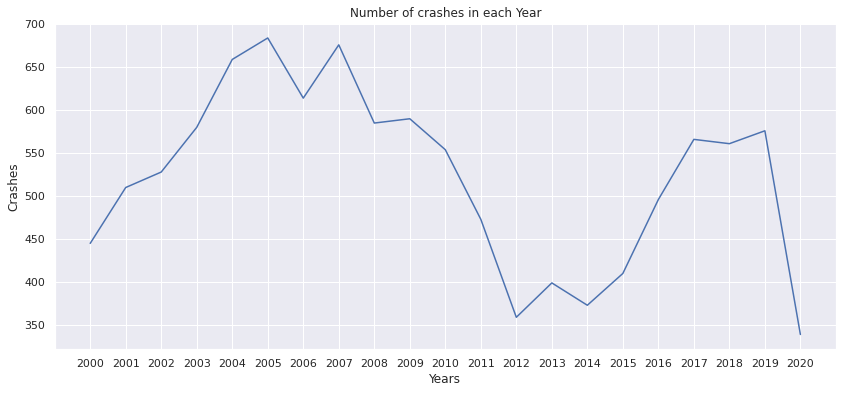

In [ ]:
plt.figure(figsize = (14,6))
plt.plot(data['Crash Year'].astype(str), data['Crashes'])
plt.title('Number of crashes in each Year')
plt.xlabel('Years')
plt.ylabel('Crashes')
plt.show()

## **Different feature analysis**

In [ ]:
data = df['Crash Severity'].value_counts().reset_index().rename(columns = {'index': 'Crash Severity', 'Crash Severity':'Crashes'})
data

,Crash Severity,Crashes
0,Non-Injury Crash,7560
1,Minor Crash,2567
2,Serious Crash,713
3,Fatal Crash,137


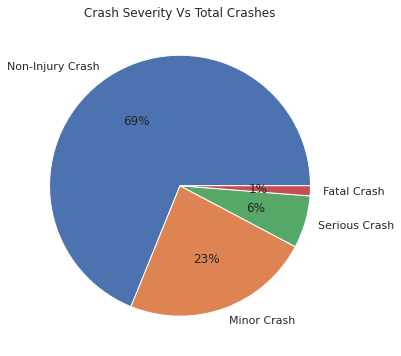

In [ ]:
plt.figure(figsize = (6,6))
plt.title('Crash Severity Vs Total Crashes')
plt.pie(data['Crashes'], labels=data['Crash Severity'].astype(str), autopct='%1.0f%%')
plt.show()

In [ ]:
bicycle_crash = df[['Bicycle','Crash Severity']]
bicycle_crash = bicycle_crash.groupby(['Crash Severity'])['Bicycle'].sum().reset_index()
bicycle_crash

,Crash Severity,Bicycle
0,Fatal Crash,11.0
1,Minor Crash,285.0
2,Non-Injury Crash,76.0
3,Serious Crash,70.0


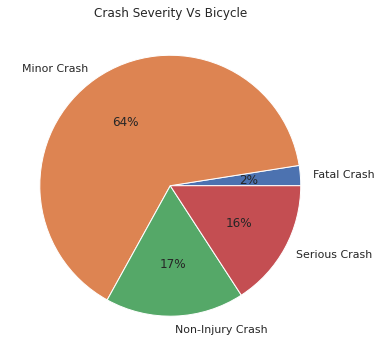

In [ ]:
plt.figure(figsize = (6,6))
plt.title('Crash Severity Vs Bicycle')
plt.pie(bicycle_crash['Bicycle'], labels=bicycle_crash['Crash Severity'].astype(str), autopct='%1.0f%%')
plt.show()

In [ ]:
value = df.groupby(['Crash Year','Crash Severity'])['Crash Severity'].count().unstack()
value

Crash Severity,Fatal Crash,Minor Crash,Non-Injury Crash,Serious Crash
Crash Year,,,,
2000,9,71,336,29
2001,3,78,395,34
2002,6,124,360,38
2003,5,133,401,41
2004,6,149,455,49
2005,17,180,451,36
2006,8,166,392,48
2007,13,163,465,35
2008,5,127,413,40


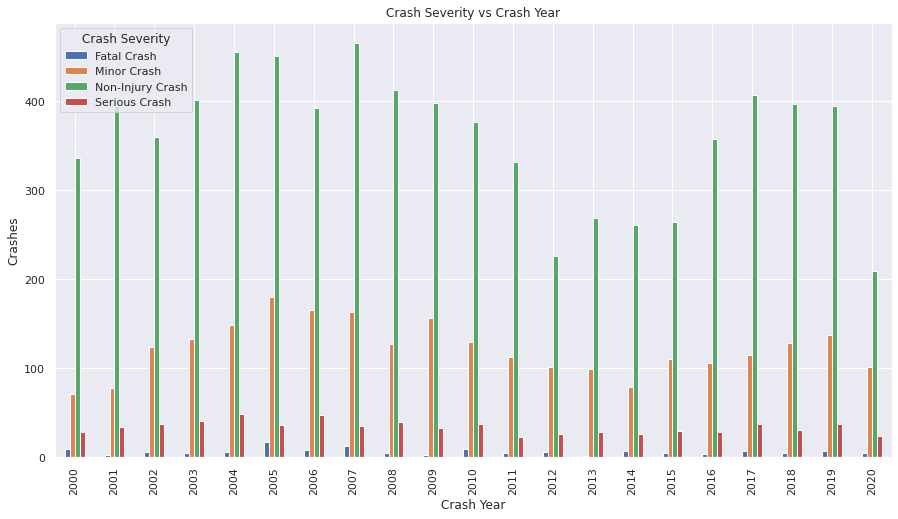

In [ ]:
df.groupby(['Crash Year','Crash Severity'])['Crash Severity'].count().unstack().plot(kind = 'bar', figsize = (15,8))
plt.ylabel('Crashes')
plt.title('Crash Severity vs Crash Year')
plt.show()

In [ ]:
df['Light'].value_counts()

Bright sun    4589
Overcast      2965
Dark          2851
Twilight       540
Unknown         32
Name: Light, dtype: int64

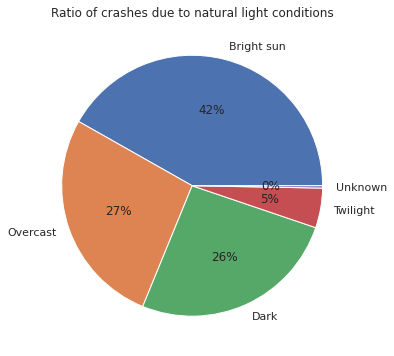

In [ ]:
plt.figure(figsize = (6,6))
plt.pie(df['Light'].value_counts(), labels=df['Light'].value_counts().reset_index()['index'], autopct='%1.0f%%')
plt.title('Ratio of crashes due to natural light conditions')
plt.show()

In [ ]:
weather = df[df['Weather'] != 'Null']

In [ ]:
weather['Weather'].value_counts()

Fine           8744
Light rain     1587
Heavy rain      402
Mist or Fog     154
Snow              5
Name: Weather, dtype: int64

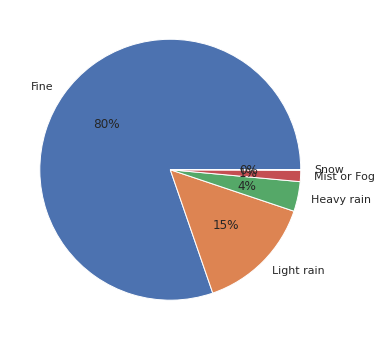

In [ ]:
plt.figure(figsize = (6,6))
plt.pie(weather['Weather'].value_counts(), labels=weather['Weather'].value_counts().reset_index()['index'], autopct='%1.0f%%')
plt.show()

In [ ]:
vehicles = df[['Bicycle', 'Bus', 'Car/Wagon','Moped', 'Motorcycle','Suv', 'Taxi', 'Train', 'Truck' ]]

In [ ]:
vehicles = vehicles.sum().reset_index()
vehicles.columns= ['Vehicles','Count']

In [ ]:
vehicles

,Vehicles,Count
0,Bicycle,442.0
1,Bus,78.0
2,Car/Wagon,13430.0
3,Moped,79.0
4,Motorcycle,378.0
5,Suv,983.0
6,Taxi,34.0
7,Train,3.0
8,Truck,858.0


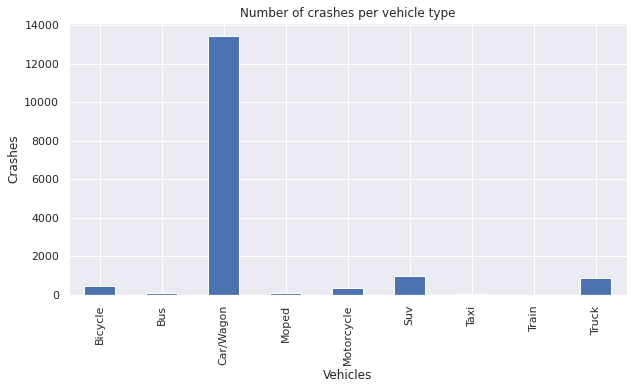

In [ ]:
ax = vehicles['Count'].plot(kind='bar', figsize = (10,5))
plt.xticks([0,1,2,3,4,5,6,7,8], vehicles['Vehicles'])
plt.title('Number of crashes per vehicle type')
plt.xlabel('Vehicles')
plt.ylabel('Crashes')
plt.show()

In [ ]:
urban_open = df['Urban'].value_counts().reset_index()
urban_open.columns = ['Urban', 'Counts']
urban_open = urban_open[urban_open['Urban']!= 'Null']
urban_open['Urban'] = ['Urban', 'Rural']
urban_open

,Urban,Counts
0,Urban,6315
1,Rural,4662


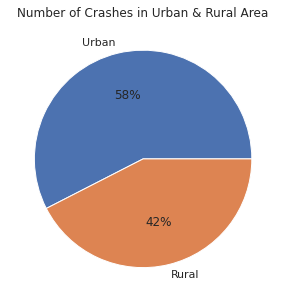

In [ ]:
plt.figure(figsize = (5,5))
plt.pie(urban_open['Counts'], labels=urban_open['Urban'], autopct='%1.0f%%')
plt.title('Number of Crashes in Urban & Rural Area')
plt.show()

In [ ]:
df['Speedlimit'] = df['Speedlimit'].astype(float)

In [ ]:
speed = df[['Speedlimit']].dropna().astype(int).astype(str)
speed['Speedlimit'].value_counts()

50     5819
100    4347
70      446
80      313
60       25
30       13
40        7
10        3
20        2
110       1
90        1
Name: Speedlimit, dtype: int64

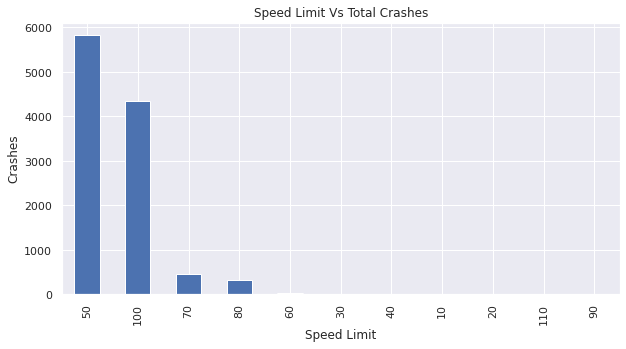

In [ ]:
ax = speed['Speedlimit'].value_counts().plot(kind='bar', figsize = (10,5))
plt.xticks([0,1,2,3,4,5,6,7,8,9,10], speed['Speedlimit'].value_counts().index.astype(str))
plt.title('Speed Limit Vs Total Crashes')
plt.xlabel('Speed Limit')
plt.ylabel('Crashes')
plt.show()

In [ ]:
day = df['Holiday']

In [ ]:
day.value_counts()

Normal Day            10311
Christmas New Year      289
Easter                  161
Queens Birthday         127
Labour Weekend           89
Name: Holiday, dtype: int64

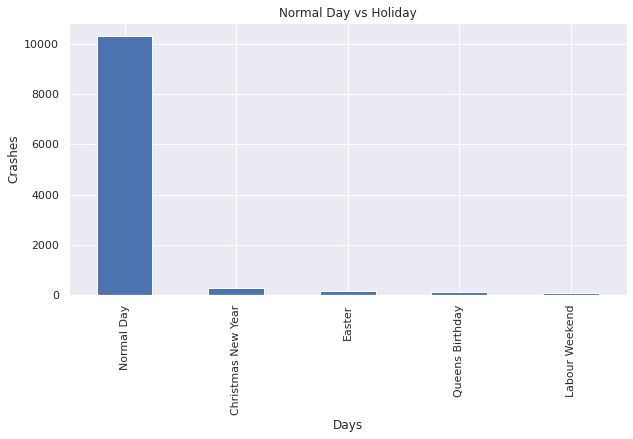

In [ ]:
ax = day.value_counts().plot(kind='bar', figsize = (10,5))
plt.xticks([0,1,2,3,4], day.value_counts().index.astype(str))
plt.title('Normal Day vs Holiday')
plt.xlabel('Days')
plt.ylabel('Crashes')
plt.show()

In [ ]:
import seaborn as sb

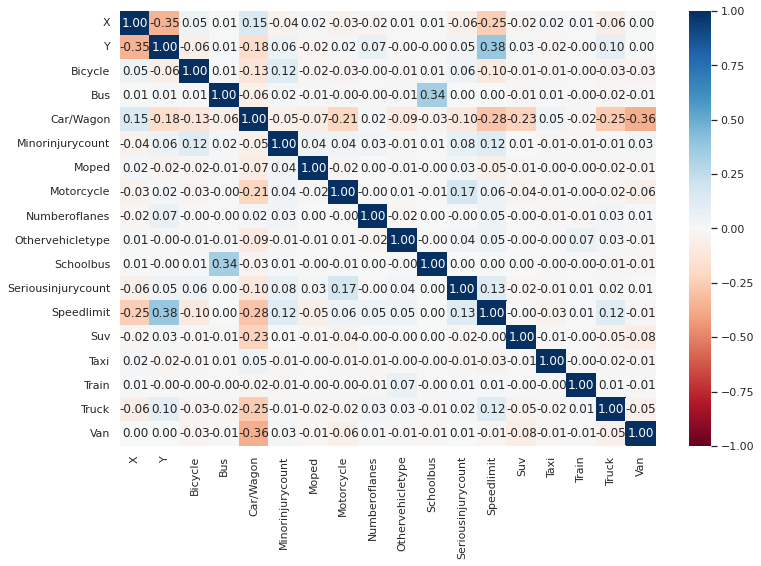

In [ ]:
f, axes = plt.subplots(1, 1, figsize=(12, 8))
sb.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f",cmap = "RdBu")
plt.show()

In [ ]:
import geopandas as gpd

In [ ]:
df_value = df[df['Crash Severity'] == 'Serious Crash']

In [ ]:
df_geometry_list = gpd.points_from_xy(x=df_value['X'], y=df_value['Y'])

In [ ]:
crashes = gpd.GeoDataFrame(df_value, geometry = df_geometry_list, crs="EPSG:2193")

In [ ]:
crashes_map = crashes.to_crs(epsg=4326)

In [ ]:
import folium

In [ ]:
nz_map=folium.Map(location=[-39.5,177],zoom_start=10,tiles = 'cartodbpositron')
points_geometry = folium.features.GeoJson(crashes)
points_geometry.add_to(nz_map)
nz_map

In [ ]:
df.head()

,X,Y,Bicycle,Bus,Car/Wagon,Crash Severity,Crash Year,Directionroledescription,Flathill,Holiday,Light,Minorinjurycount,Moped,Motorcycle,Numberoflanes,Othervehicletype,Roadlane,Roadsurface,Schoolbus,Seriousinjurycount,Speedlimit,Streetlight,Suv,Taxi,Train,Truck,Urban,Van,Weather
0,1930341.0,5604822.0,0.0,0.0,2.0,Minor Crash,2017,West,Flat,Normal Day,Overcast,1.0,0.0,0.0,2.0,0.0,2-way,Sealed,0.0,0.0,50.0,Null,0.0,0.0,0.0,0.0,Urban,0.0,Fine
1,1929833.0,5604896.0,0.0,0.0,2.0,Non-Injury Crash,2016,South,Flat,Normal Day,Bright sun,0.0,0.0,0.0,2.0,0.0,2-way,Sealed,0.0,0.0,50.0,Null,0.0,0.0,0.0,0.0,Urban,0.0,Fine
2,1933283.0,5600884.0,0.0,0.0,1.0,Non-Injury Crash,2006,West,Hill Road,Normal Day,Bright sun,0.0,0.0,0.0,2.0,0.0,2-way,Sealed,0.0,0.0,50.0,Null,0.0,0.0,0.0,1.0,Urban,0.0,Fine
3,1928678.0,5609906.0,0.0,0.0,1.0,Serious Crash,2005,North,Flat,Normal Day,Dark,2.0,0.0,0.0,2.0,0.0,2-way,Sealed,0.0,1.0,100.0,On,0.0,0.0,0.0,0.0,Open,0.0,Fine
4,1934619.0,5608465.0,0.0,0.0,2.0,Non-Injury Crash,2004,North,Flat,Easter,Bright sun,0.0,0.0,0.0,2.0,0.0,2-way,Sealed,0.0,0.0,100.0,Null,0.0,0.0,0.0,0.0,Open,0.0,Fine


# **Machine Learning Process**

## **Time Series Forecast**

## **Predict data for future**

https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

In this section, we can check the crashes forecast for next 10 years

In [ ]:
time_series = df['Crash Year'].value_counts().reset_index().rename(columns = {'index': 'Crash Year', 'Crash Year':'Crashes'}).sort_values(by = ['Crash Year'])
ts = time_series.reset_index(drop = True)

In [ ]:
ts.head()

,Crash Year,Crashes
0,2000,445
1,2001,510
2,2002,528
3,2003,580
4,2004,659


in order to do forecast we need day-month-year format.

In [ ]:
import numpy as np
ts.insert(2, "day", np.ones(len(ts)), True)
ts.insert(3, "month", np.ones(len(ts)), True)

In [ ]:
ts.head()

,Crash Year,Crashes,day,month
0,2000,445,1.0,1.0
1,2001,510,1.0,1.0
2,2002,528,1.0,1.0
3,2003,580,1.0,1.0
4,2004,659,1.0,1.0


In [ ]:
ts = ts.apply(pd.to_numeric)

In [ ]:
ts.head()

,Crash Year,Crashes,day,month
0,2000,445,1.0,1.0
1,2001,510,1.0,1.0
2,2002,528,1.0,1.0
3,2003,580,1.0,1.0
4,2004,659,1.0,1.0


In [ ]:
df2 = ts[["Crash Year", "month", "day"]].copy()
df2.columns = ["year", "month", "day"]
df2 = pd.to_datetime(df2)

In [ ]:
ts['Crash Year'] = df2

In [ ]:
ts.head()

,Crash Year,Crashes,day,month
0,2000-01-01,445,1.0,1.0
1,2001-01-01,510,1.0,1.0
2,2002-01-01,528,1.0,1.0
3,2003-01-01,580,1.0,1.0
4,2004-01-01,659,1.0,1.0


In [ ]:
ts.drop(['day', 'month'], axis=1, inplace=True)

In [ ]:
ts.head()

,Crash Year,Crashes
0,2000-01-01,445
1,2001-01-01,510
2,2002-01-01,528
3,2003-01-01,580
4,2004-01-01,659


In [ ]:
ts = ts.set_index('Crash Year')
ts.index

DatetimeIndex(['2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
               '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01',
               '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01',
               '2020-01-01'],
              dtype='datetime64[ns]', name='Crash Year', freq=None)

In [ ]:
ts.head()

,Crashes
Crash Year,
2000-01-01,445
2001-01-01,510
2002-01-01,528
2003-01-01,580
2004-01-01,659


The below graph shows the crashes per year that is given in data

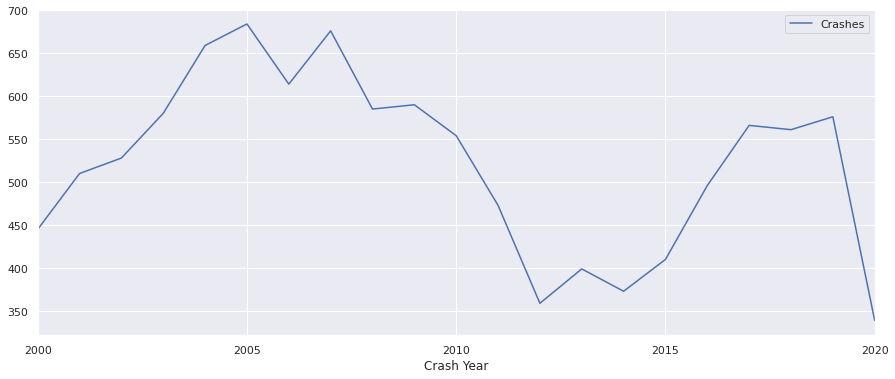

In [ ]:
ts.plot(figsize=(15, 6))
plt.show()

Now we are analyzing time series based mean and variance of crashes

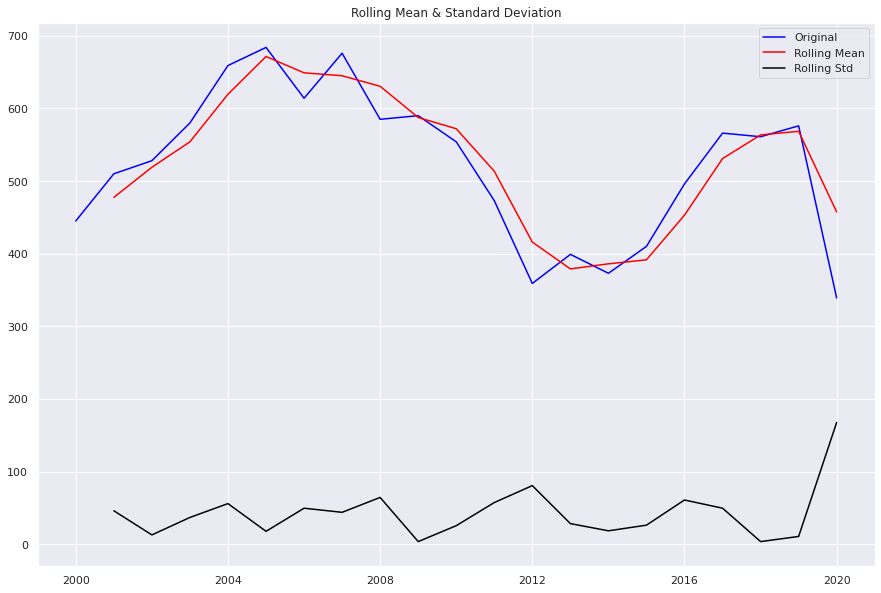

Results of Dickey-Fuller Test:
Test Statistic                 -1.418324
p-value                         0.573460
#Lags Used                      0.000000
Number of Observations Used    20.000000
Critical Value (1%)            -3.809209
Critical Value (5%)            -3.021645
Critical Value (10%)           -2.650713
dtype: float64


In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(2).mean()
    #rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = timeseries.rolling(2).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15, 10))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.iloc[:,0])
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

test_stationarity(ts)

ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data:

In [ ]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


This step is parameter Selection for our furniture’s sales ARIMA Time Series Model. Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model.

In [ ]:
for param in pdq:
  for param_seasonal in seasonal_pdq:
    try:
      mod = sm.tsa.statespace.SARIMAX(ts,
                                      order=param,
                                      seasonal_order=param_seasonal,
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)

      results = mod.fit()

      print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
    except:
        continue

Fit the ARIMA Model

In [ ]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(ts,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 1),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3310     14.211     -0.023      0.981     -28.184      27.522
ma.L1          0.1288      4.857      0.027      0.979      -9.391       9.649
ar.S.L1       -0.4368      9.652     -0.045      0.964     -19.354      18.481
sigma2      7747.2594   2717.008      2.851      0.004    2422.021    1.31e+04


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


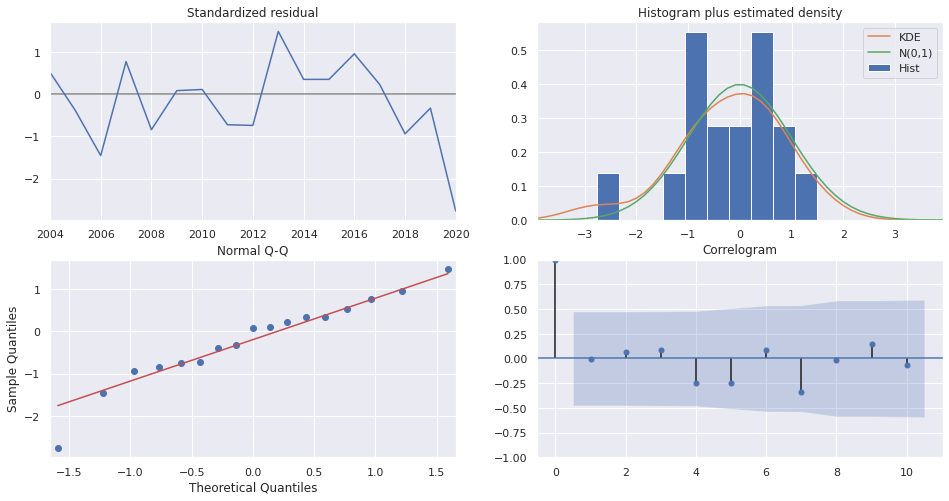

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

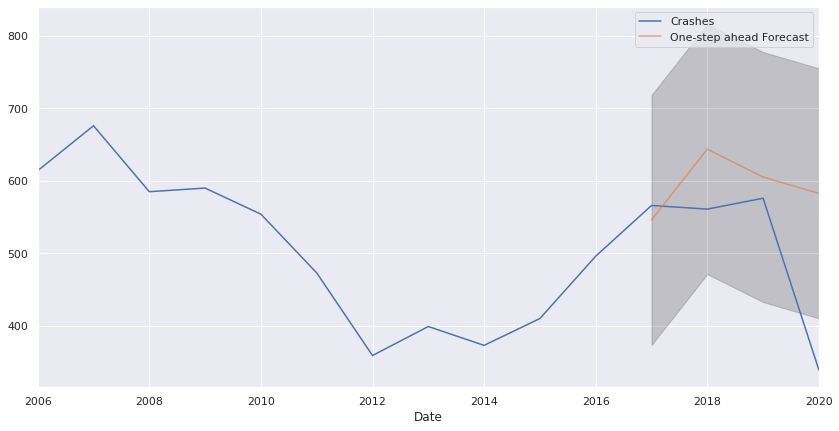

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = ts['2006':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('')
plt.legend()
plt.show()

Now we can predict next 10 years forecast and it shows that the crashes forecast will decrease with time.

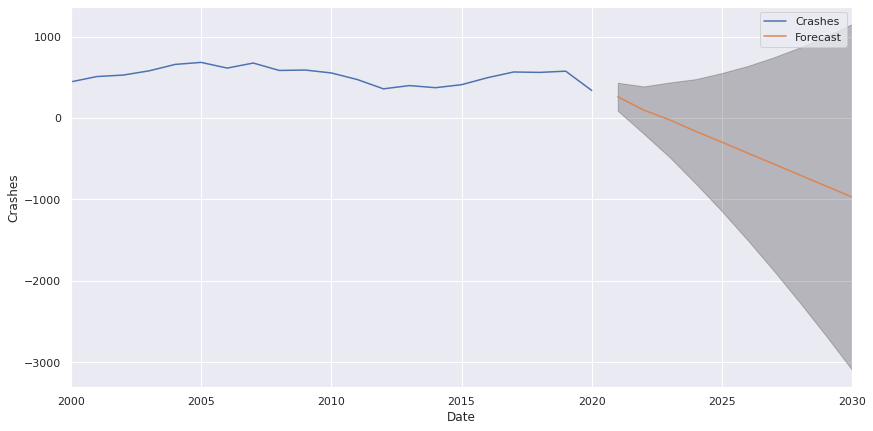

In [ ]:
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()
ax = ts.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Crashes')
plt.legend()
plt.show()

# **Data Analysis**

# **Clean data appropriate for analysis**

Calculate correlation: If correlation is less then we will get more accuracy.

The below figure shows the correlation between features. If correlation if high between two features so we drop that feature otherwise we need less correlation to get good accuracy.


Text(0.5, 1.0, 'Correlation between different fearures')

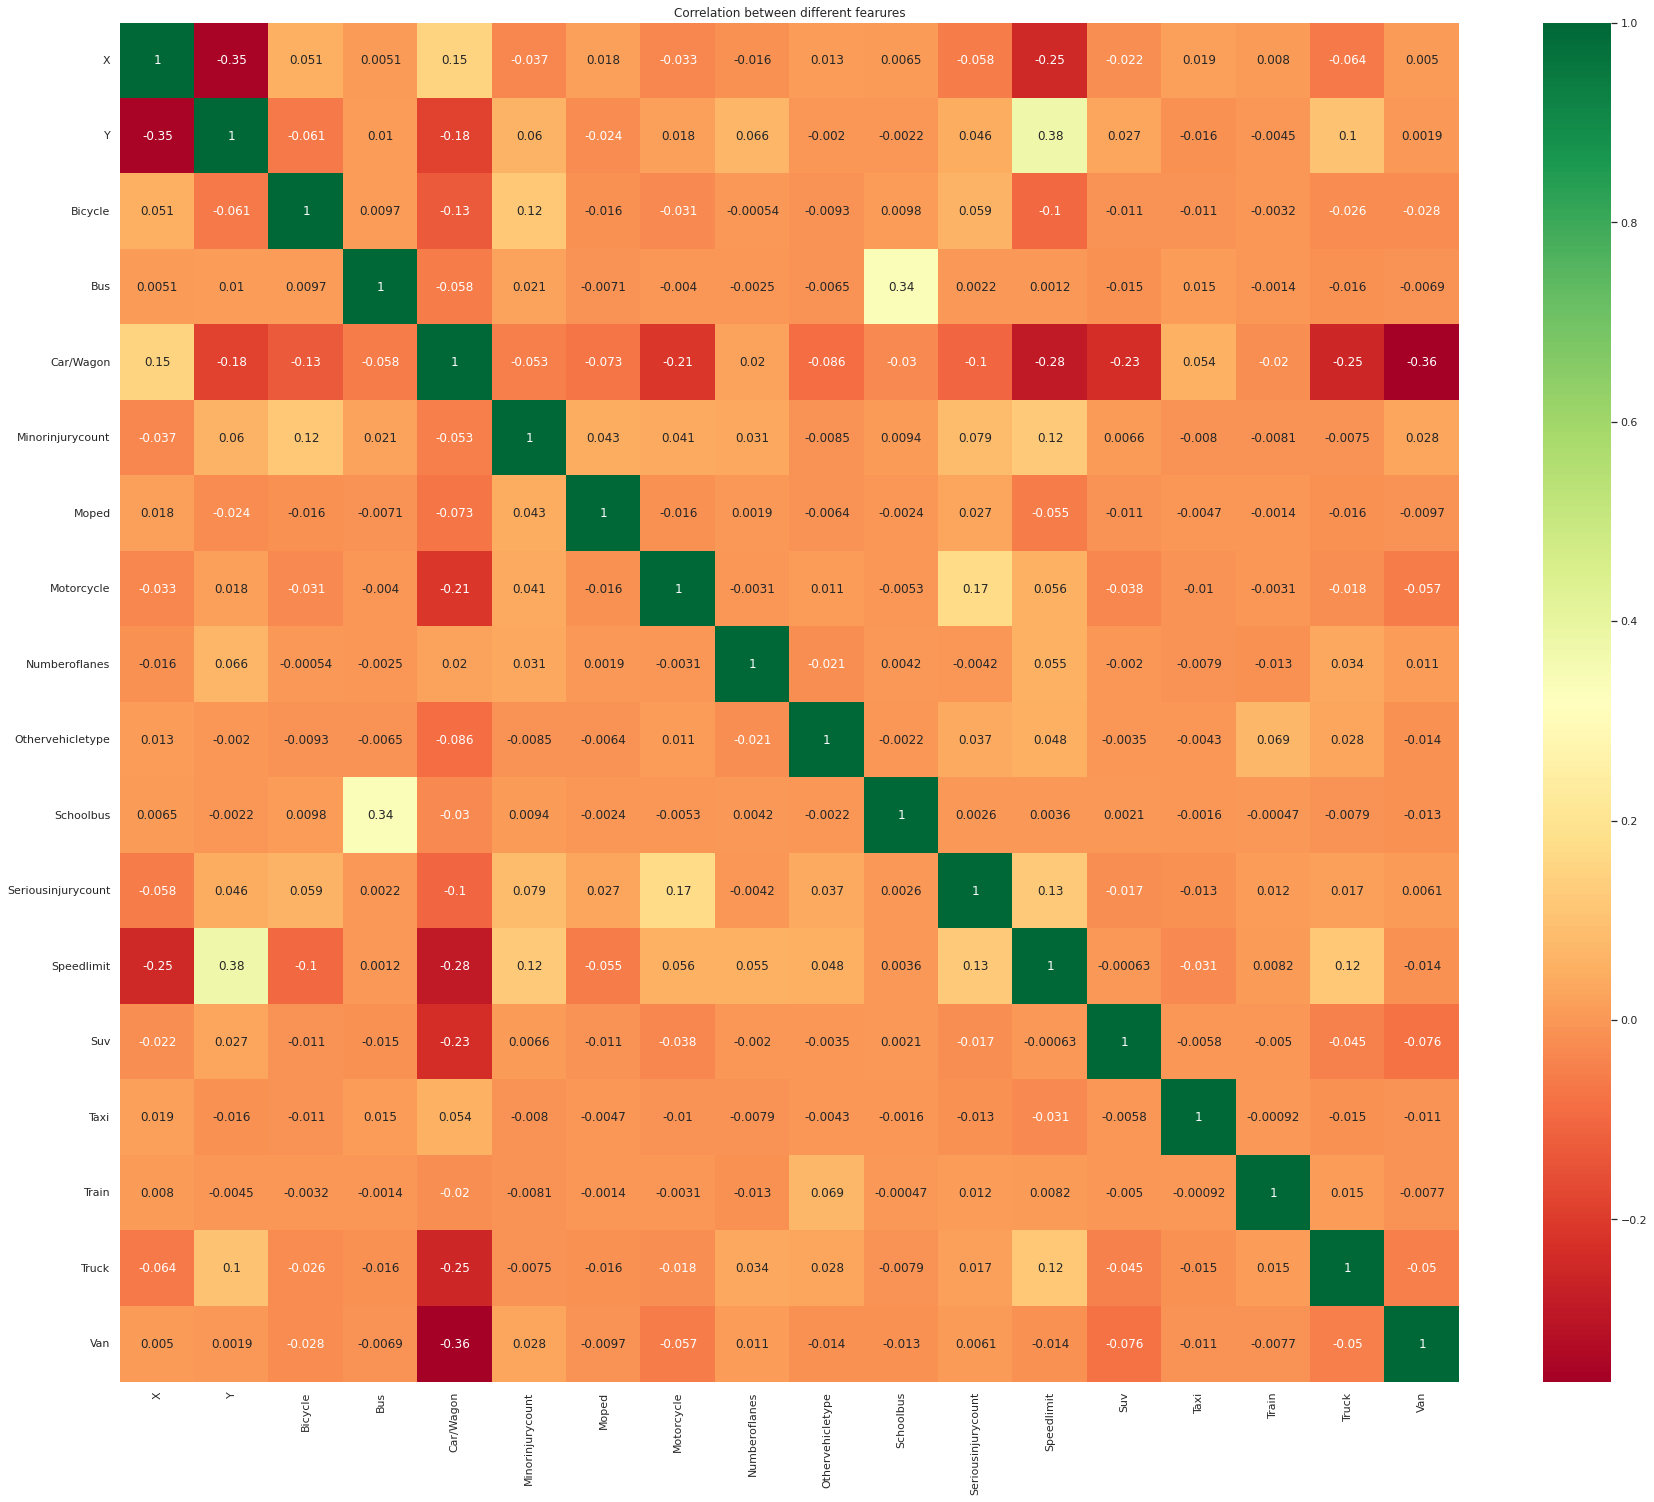

In [ ]:
import seaborn as sns
# plot correlation
corr = df.corr()
plt.figure(figsize=(30,25))
sns.heatmap(corr,annot=True,cmap="RdYlGn")
plt.title('Correlation between different fearures')

In [ ]:
df.head()

,X,Y,Bicycle,Bus,Car/Wagon,Crash Severity,Crash Year,Directionroledescription,Flathill,Holiday,Light,Minorinjurycount,Moped,Motorcycle,Numberoflanes,Othervehicletype,Roadlane,Roadsurface,Schoolbus,Seriousinjurycount,Speedlimit,Streetlight,Suv,Taxi,Train,Truck,Urban,Van,Weather
0,1930341.0,5604822.0,0.0,0.0,2.0,Minor Crash,2017,West,Flat,Normal Day,Overcast,1.0,0.0,0.0,2.0,0.0,2-way,Sealed,0.0,0.0,50.0,Null,0.0,0.0,0.0,0.0,Urban,0.0,Fine
1,1929833.0,5604896.0,0.0,0.0,2.0,Non-Injury Crash,2016,South,Flat,Normal Day,Bright sun,0.0,0.0,0.0,2.0,0.0,2-way,Sealed,0.0,0.0,50.0,Null,0.0,0.0,0.0,0.0,Urban,0.0,Fine
2,1933283.0,5600884.0,0.0,0.0,1.0,Non-Injury Crash,2006,West,Hill Road,Normal Day,Bright sun,0.0,0.0,0.0,2.0,0.0,2-way,Sealed,0.0,0.0,50.0,Null,0.0,0.0,0.0,1.0,Urban,0.0,Fine
3,1928678.0,5609906.0,0.0,0.0,1.0,Serious Crash,2005,North,Flat,Normal Day,Dark,2.0,0.0,0.0,2.0,0.0,2-way,Sealed,0.0,1.0,100.0,On,0.0,0.0,0.0,0.0,Open,0.0,Fine
4,1934619.0,5608465.0,0.0,0.0,2.0,Non-Injury Crash,2004,North,Flat,Easter,Bright sun,0.0,0.0,0.0,2.0,0.0,2-way,Sealed,0.0,0.0,100.0,Null,0.0,0.0,0.0,0.0,Open,0.0,Fine


**check unique values in column**


From the analysis of data we observed that we will not get any missing value or null value, but resulting in a list of unique values.


In [ ]:
for col in df:
  print(col , "Unique values are" , df[col].unique())

X Unique values are [1930341. 1929833. 1933283. ... 1923817. 1931543. 1928453.]
Y Unique values are [5604822. 5604896. 5600884. ... 5612266. 5602894. 5603438.]
Bicycle Unique values are [0. 1. 2. 4. 5. 3.]
Bus Unique values are [0. 1.]
Car/Wagon Unique values are [2. 1. 0. 4. 3. 5.]
Crash Severity Unique values are ['Minor Crash' 'Non-Injury Crash' 'Serious Crash' 'Fatal Crash']
Crash Year Unique values are ['2017' '2016' '2006' '2005' '2004' '2000' '2011' '2012' '2015' '2001'
 '2008' '2013' '2019' '2002' '2014' '2009' '2010' '2020' '2007' '2003'
 '2018']
Directionroledescription Unique values are ['West' 'South' 'North' 'East' 'Null']
Flathill Unique values are ['Flat' 'Hill Road' 'Null']
Holiday Unique values are ['Normal Day' 'Easter' 'Christmas New Year' 'Labour Weekend'
 'Queens Birthday']
Light Unique values are ['Overcast' 'Bright sun' 'Dark' 'Twilight' 'Unknown']
Minorinjurycount Unique values are [ 1.  0.  2.  3.  6.  8.  4.  5.  7. 10.]
Moped Unique values are [0. 1. 2.]
Moto

**fill null values**

In [ ]:
df = df.fillna(0)

drop x and y axis 

In [ ]:
df.drop(['X', 'Y'], axis=1, inplace=True)

In [ ]:
df.head()

,Bicycle,Bus,Car/Wagon,Crash Severity,Crash Year,Directionroledescription,Flathill,Holiday,Light,Minorinjurycount,Moped,Motorcycle,Numberoflanes,Othervehicletype,Roadlane,Roadsurface,Schoolbus,Seriousinjurycount,Speedlimit,Streetlight,Suv,Taxi,Train,Truck,Urban,Van,Weather
0,0.0,0.0,2.0,Minor Crash,2017,West,Flat,Normal Day,Overcast,1.0,0.0,0.0,2.0,0.0,2-way,Sealed,0.0,0.0,50.0,Null,0.0,0.0,0.0,0.0,Urban,0.0,Fine
1,0.0,0.0,2.0,Non-Injury Crash,2016,South,Flat,Normal Day,Bright sun,0.0,0.0,0.0,2.0,0.0,2-way,Sealed,0.0,0.0,50.0,Null,0.0,0.0,0.0,0.0,Urban,0.0,Fine
2,0.0,0.0,1.0,Non-Injury Crash,2006,West,Hill Road,Normal Day,Bright sun,0.0,0.0,0.0,2.0,0.0,2-way,Sealed,0.0,0.0,50.0,Null,0.0,0.0,0.0,1.0,Urban,0.0,Fine
3,0.0,0.0,1.0,Serious Crash,2005,North,Flat,Normal Day,Dark,2.0,0.0,0.0,2.0,0.0,2-way,Sealed,0.0,1.0,100.0,On,0.0,0.0,0.0,0.0,Open,0.0,Fine
4,0.0,0.0,2.0,Non-Injury Crash,2004,North,Flat,Easter,Bright sun,0.0,0.0,0.0,2.0,0.0,2-way,Sealed,0.0,0.0,100.0,Null,0.0,0.0,0.0,0.0,Open,0.0,Fine


**Remove Null values**

Remove those values which contain NULL as a string

In [ ]:
for col in df:
  print(col , "Unique values are" , df[col].unique())

Bicycle Unique values are [0. 1. 2. 4. 5. 3.]
Bus Unique values are [0. 1.]
Car/Wagon Unique values are [2. 1. 0. 4. 3. 5.]
Crash Severity Unique values are ['Minor Crash' 'Non-Injury Crash' 'Serious Crash' 'Fatal Crash']
Crash Year Unique values are ['2017' '2016' '2006' '2005' '2004' '2000' '2011' '2012' '2015' '2001'
 '2008' '2013' '2019' '2002' '2014' '2009' '2010' '2020' '2007' '2003'
 '2018']
Directionroledescription Unique values are ['West' 'South' 'North' 'East' 'Null']
Flathill Unique values are ['Flat' 'Hill Road' 'Null']
Holiday Unique values are ['Normal Day' 'Easter' 'Christmas New Year' 'Labour Weekend'
 'Queens Birthday']
Light Unique values are ['Overcast' 'Bright sun' 'Dark' 'Twilight' 'Unknown']
Minorinjurycount Unique values are [ 1.  0.  2.  3.  6.  8.  4.  5.  7. 10.]
Moped Unique values are [0. 1. 2.]
Motorcycle Unique values are [0. 1. 2.]
Numberoflanes Unique values are [2. 1. 3. 4. 0. 6. 5. 7.]
Othervehicletype Unique values are [0. 1. 2.]
Roadlane Unique valu

In [ ]:
df = df[df['Directionroledescription'] != "Null"]
df = df[df['Flathill'] != "Null"]
df = df[df['Roadlane'] != "Null"]
df = df[df['Roadsurface'] != "Null"]
df = df[df['Streetlight'] != "Null"]
df = df[df['Weather'] != "Null"]

In [ ]:
for col in df:
  print(col , "Unique values are" , df[col].unique())

Bicycle Unique values are [0. 1.]
Bus Unique values are [0. 1.]
Car/Wagon Unique values are [1. 2. 0. 4. 3. 5.]
Crash Severity Unique values are ['Serious Crash' 'Non-Injury Crash' 'Minor Crash' 'Fatal Crash']
Crash Year Unique values are ['2005' '2004' '2008' '2013' '2001' '2015' '2006' '2000' '2009' '2019'
 '2010' '2016' '2020' '2014' '2017' '2012' '2011' '2002' '2003' '2018'
 '2007']
Directionroledescription Unique values are ['North' 'East' 'West' 'South']
Flathill Unique values are ['Flat' 'Hill Road']
Holiday Unique values are ['Normal Day' 'Christmas New Year' 'Easter' 'Queens Birthday'
 'Labour Weekend']
Light Unique values are ['Dark' 'Twilight' 'Bright sun' 'Overcast' 'Unknown']
Minorinjurycount Unique values are [ 2.  0.  1.  3.  8.  5.  4.  6. 10.]
Moped Unique values are [0. 1.]
Motorcycle Unique values are [0. 1. 2.]
Numberoflanes Unique values are [2. 1. 3. 4. 0. 6. 5. 7.]
Othervehicletype Unique values are [0. 1. 2.]
Roadlane Unique values are ['2-way' '1-way' 'Off road

# **Preprocessing data**

convert Categorical to Numerical data using ordinalEncoder

We use ordinal encoder from scikit learn library. So, we will convert data. categorical to numerical and we receive float digits data types after that we use pd.to_numerical command to covert float digits data in integer.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
ord_enc = OrdinalEncoder()
df["Directionroledescription"] = ord_enc.fit_transform(df[["Directionroledescription"]])
df["Flathill"] = ord_enc.fit_transform(df[["Flathill"]])
df["Holiday"] = ord_enc.fit_transform(df[["Holiday"]])
df["Light"] = ord_enc.fit_transform(df[["Light"]])
df["Roadlane"] = ord_enc.fit_transform(df[["Roadlane"]])
df["Roadsurface"] = ord_enc.fit_transform(df[["Roadsurface"]])
df["Streetlight"] = ord_enc.fit_transform(df[["Streetlight"]])
df["Urban"] = ord_enc.fit_transform(df[["Urban"]])
df["Weather"] = ord_enc.fit_transform(df[["Weather"]])
df["Crash Severity"] = ord_enc.fit_transform(df[["Crash Severity"]])

In [ ]:
df.head()

,Bicycle,Bus,Car/Wagon,Crash Severity,Crash Year,Directionroledescription,Flathill,Holiday,Light,Minorinjurycount,Moped,Motorcycle,Numberoflanes,Othervehicletype,Roadlane,Roadsurface,Schoolbus,Seriousinjurycount,Speedlimit,Streetlight,Suv,Taxi,Train,Truck,Urban,Van,Weather
3,0.0,0.0,1.0,3.0,2005,1.0,0.0,3.0,1.0,2.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,1.0,100.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,2.0,2.0,2004,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,50.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
14,0.0,0.0,2.0,2.0,2004,3.0,0.0,3.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,50.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17,0.0,0.0,1.0,1.0,2008,2.0,0.0,3.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,50.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20,0.0,0.0,1.0,1.0,2013,0.0,0.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df = df.apply(pd.to_numeric)

In [ ]:
df.head()

,Bicycle,Bus,Car/Wagon,Crash Severity,Crash Year,Directionroledescription,Flathill,Holiday,Light,Minorinjurycount,Moped,Motorcycle,Numberoflanes,Othervehicletype,Roadlane,Roadsurface,Schoolbus,Seriousinjurycount,Speedlimit,Streetlight,Suv,Taxi,Train,Truck,Urban,Van,Weather
3,0.0,0.0,1.0,3.0,2005,1.0,0.0,3.0,1.0,2.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,1.0,100.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,2.0,2.0,2004,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,50.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
14,0.0,0.0,2.0,2.0,2004,3.0,0.0,3.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,50.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17,0.0,0.0,1.0,1.0,2008,2.0,0.0,3.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,50.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20,0.0,0.0,1.0,1.0,2013,0.0,0.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**analyze label data**

In [ ]:
df['Crash Severity']

3        3.0
8        2.0
14       2.0
17       1.0
20       1.0
        ... 
10992    2.0
10993    2.0
10995    2.0
10997    2.0
10998    2.0
Name: Crash Severity, Length: 4308, dtype: float64

**Split into features and labels**

In this, we split that data into features and labels, and here we consider Crash Severity as a label in our data.


In [ ]:
# Split data into training and testing
from sklearn.model_selection import train_test_split

# predict salary
X = df.drop('Crash Severity',axis=1)
y = df['Crash Severity']

**Scaling the data**

Scale the data between 0 and 1.

 The scaling function is used to scale the data between 0 and 1. The formulate of scaling data is (input_data - minimum)/(maximum-minimum)

In [ ]:
#Scaling the data
def scaling(input_data):
    minimum = np.amin(input_data, axis=0)
    maximum = np.amax(input_data, axis=0)
    normalized_data = (input_data - minimum)/(maximum - minimum)
    return normalized_data
X = scaling(X)

In [ ]:
X

,Bicycle,Bus,Car/Wagon,Crash Year,Directionroledescription,Flathill,Holiday,Light,Minorinjurycount,Moped,Motorcycle,Numberoflanes,Othervehicletype,Roadlane,Roadsurface,Schoolbus,Seriousinjurycount,Speedlimit,Streetlight,Suv,Taxi,Train,Truck,Urban,Van,Weather
3,0.0,0.0,0.2,0.25,0.333333,0.0,0.75,0.25,0.2,0.0,0.0,0.285714,0.0,0.5,0.5,0.0,0.25,0.9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
8,0.0,0.0,0.4,0.20,0.000000,0.0,0.75,0.25,0.0,0.0,0.0,0.142857,0.0,0.5,0.5,0.0,0.00,0.4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.50
14,0.0,0.0,0.4,0.20,1.000000,0.0,0.75,0.25,0.0,0.0,0.0,0.285714,0.0,0.5,0.5,0.0,0.00,0.4,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.00
17,0.0,0.0,0.2,0.40,0.666667,0.0,0.75,0.25,0.1,0.0,0.0,0.285714,0.0,0.5,0.5,0.0,0.00,0.4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00
20,0.0,0.0,0.2,0.65,0.000000,0.0,0.75,0.25,0.1,0.0,0.0,0.142857,0.0,0.5,0.5,0.0,0.00,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10992,0.0,0.0,0.4,0.25,0.333333,1.0,0.75,0.75,0.0,0.0,0.0,0.285714,0.0,0.5,0.5,0.0,0.00,0.4,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.00
10993,0.0,0.0,0.2,0.90,0.333333,0.0,0.75,0.25,0.0,0.0,0.0,0.285714,0.0,0.5,0.5,0.0,0.00,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.75
10995,0.0,0.0,0.0,0.45,0.000000,0.0,0.75,0.75,0.0,0.0,0.0,0.285714,0.0,0.5,0.5,0.0,0.00,0.4,0.5,1.0,0.0,0.0,0.0,1.0,0.0,0.00
10997,0.0,0.0,0.2,0.85,1.000000,0.0,0.75,0.25,0.0,0.0,0.0,0.285714,0.0,0.5,0.5,0.0,0.00,0.6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.25


**Train Test Split**

Here we split the data into training and testing. For Training we split data 70% and testing 30%.

In [ ]:
# split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

print("Training data is: ")
print(X_train.shape, y_train.shape)
print("Testing data is: ")
print(X_test.shape, y_test.shape)

Training data is: 
(3015, 26) (3015,)
Testing data is: 
(1293, 26) (1293,)


# **Develop and optimise an ML model**

# **RandomForestRegressor**

In [ ]:
def rmse(x,y): return np.sqrt(((x-y)**2).mean())
def print_score(m):
    res = ["RMSE training: "+ str(rmse(m.predict(X_train), y_train)), 
           "RMSE testing: "+ str(rmse(m.predict(X_test), y_test)),
           "Accuracy training: "+ str(m.score(X_train, y_train)), 
           "Accuracy testing: "+ str(m.score(X_test, y_test))]
    
    if hasattr(m, 'oob_score_'):res.append(m.oob_score_)
    print (res)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
m = RandomForestRegressor(n_estimators=50)

In [ ]:
m.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
print_score(m)

['RMSE training: 0.13890153122782883', 'RMSE testing: 0.2921875376929467', 'Accuracy training: 0.939126840285288', 'Accuracy testing: 0.7432282796284138']


We applied random forest regressor model and got a accuracy of 74%.

**Important Features**

In [ ]:
f_imp = pd.DataFrame(data={'importance':m.feature_importances_,'features':X_train.columns}).set_index('features')
f_imp = f_imp.sort_values('importance', ascending=False)
f_imp.head(10)

,importance
features,
Minorinjurycount,0.495057
Seriousinjurycount,0.294928
Crash Year,0.051745
Directionroledescription,0.030452
Weather,0.019175
Numberoflanes,0.016477
Streetlight,0.015456
Car/Wagon,0.011947
Speedlimit,0.010955


Using this model, the accuracy of system is 74% on training data. The below figure illustrates the important features after using this model.

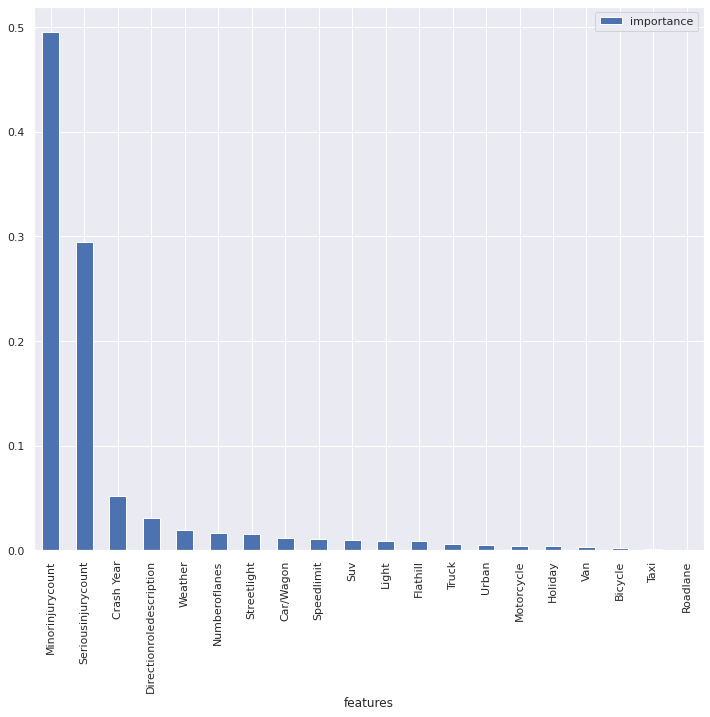

In [ ]:
f_imp[:20].plot(kind='bar', figsize=(12,10))

**Tuning of parameters**

The k represents the number if estimaters. As we change the number of estimaters the model’s accuracy is changing as shown in below figure.

In [ ]:
val = []
for i in range(30):
  i = i+1
  clf = RandomForestRegressor(n_estimators=i)
  clf.fit(X_train, y_train)
  val.append(clf.score(X_test, y_test))
  print('Accuracy for the value of k= ' , i , 'is:', clf.score(X_test, y_test))

Accuracy for the value of k=  1 is: 0.3740897152211849
Accuracy for the value of k=  2 is: 0.6107221832442837
Accuracy for the value of k=  3 is: 0.6743605734256451
Accuracy for the value of k=  4 is: 0.7117429880325491
Accuracy for the value of k=  5 is: 0.6956487817895072
Accuracy for the value of k=  6 is: 0.7143400064916998
Accuracy for the value of k=  7 is: 0.6795406165834836
Accuracy for the value of k=  8 is: 0.6884150661350675
Accuracy for the value of k=  9 is: 0.722482313331642
Accuracy for the value of k=  10 is: 0.6970285259301059
Accuracy for the value of k=  11 is: 0.7129353612710988
Accuracy for the value of k=  12 is: 0.7215951816614059
Accuracy for the value of k=  13 is: 0.7069428347743077
Accuracy for the value of k=  14 is: 0.7106171550480798
Accuracy for the value of k=  15 is: 0.7320712597828813
Accuracy for the value of k=  16 is: 0.725747420959179
Accuracy for the value of k=  17 is: 0.7197184312352678
Accuracy for the value of k=  18 is: 0.7209734918195416
Acc

from tuning of parameters we observed that number of estimator is affecting on parameters. accuracy increases when n_estimators increases.

The below graph shows the relationship between the number of estimaters and accuracy. The model’s accuracy is increasing as we increase the number of estimaters. 

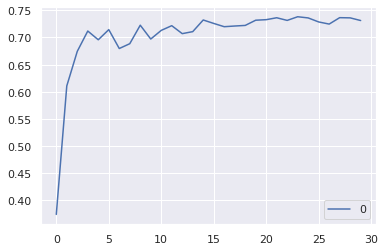

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(val) #elbow curve 
curve.plot()

from above plot we observe that number of estimator increases, we get good accuracy

# **K-Means**

Reason of applying PCA, because data has more dimensions. PCA is used to reduce dimensions.

In K-means, PCA is used to reduce the dimension. The data is divided into four components after applying PCA as shown in below figure.

In [ ]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

In [ ]:
principalComponents = pca.fit_transform(X)

In [ ]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])

Now we got 4 dimentions

In [ ]:
principalDf

,principal component 1,principal component 2,principal component 3,principal component 4
0,0.134209,-0.669694,-0.181580,0.031597
1,-0.727559,-0.321972,-0.029931,0.533496
2,-0.476643,-0.106894,0.389041,-0.335023
3,-0.741970,-0.125942,0.152003,-0.108767
4,0.710014,-0.029595,-0.515787,0.291514
...,...,...,...,...
4303,-0.218251,0.207597,0.825559,0.629740
4304,0.742145,0.163881,-0.411687,-0.042945
4305,-0.435996,0.074583,-0.175188,0.519243
4306,-0.663475,0.200267,0.113168,-0.509923


In [ ]:
import plotly.express as px
fig = px.scatter(principalComponents, x=0, y=1, color=y)
fig.show()

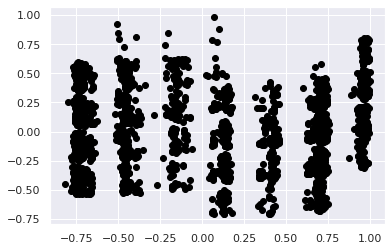

In [ ]:
plt.scatter(principalDf.iloc[:,0],principalDf.iloc[:,3],c='black')
plt.show()

Now we apply K-means clustering on data

In [ ]:
 from sklearn.cluster import KMeans
 kmeans = KMeans(n_clusters=2, random_state=112)

In [ ]:
kmeans.fit(principalDf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=112, tol=0.0001, verbose=0)

In [ ]:
y_kmeans = kmeans.predict(principalDf)

After applying K-means on PCA data, we got 2 clusters as shown in below figure.


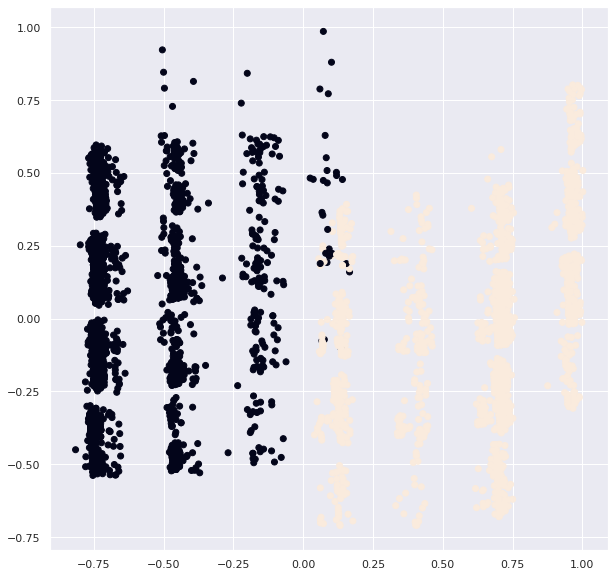

In [ ]:
plt.figure('K-means with 3 clusters', figsize=(10,10))
plt.scatter(principalDf.iloc[:, 0], principalDf.iloc[:, 3], c=kmeans.labels_)
plt.show()

# **Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix

In [ ]:
# Decision tree Model

def decisionTree(x, y, z):
  # initiate model
  classifier = DecisionTreeRegressor(max_depth=2)
  print("Model is given as ",classifier)
  # Train the model
  classifier.fit(X_train,y_train)
  # predict values
  y_pred = classifier.predict(X_test)
  # calculate accuracy
  acc = classifier.score(X_test, y_test) * 100
  print("Accuracy is", acc)
  #Get the confusion matrix

In [ ]:
decisionTree(2, 3, True)

Model is given as  DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
Accuracy is 78.07669266285768


After applying decision tree regressor model, the model accuracy we got is 78%.

**tuning of parameters**

In [ ]:
# change hyper parameter of decision tree
for i in range(5):
  for j in range(5, 8):
    print("model with ccp_alpha is "+ str(i) + " and max_depth is " + str(j))
    decisionTree(i, j, False)
    print("\n \n")

model with ccp_alpha is 0 and max_depth is 5
Model is given as  DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
Accuracy is 78.07669266285768

 

model with ccp_alpha is 0 and max_depth is 6
Model is given as  DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
Accuracy is 78.07669266285768

 

model wi

From tuning of parameters, we observed that the accuracy is same when we change the max_depth of tree. Thus max_depth doesn't affect the accuracy of model.

# **XGBOOST Model**

In [ ]:
# check xgboost version
import xgboost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# create an xgboost regression model
model = XGBRegressor()

In [ ]:
model.fit(X_train, y_train)

[09:51:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
model.predict(X_test)

array([1.9539227, 1.047136 , 1.9978606, ..., 1.9371744, 1.9877685,
       1.95329  ], dtype=float32)

In [ ]:
model.score(X_test, y_test) * 100

78.02672788043103

After applied XGBoost, we got a accuracy of 78%.

# **Model Comparison**

The comparison of random forest regressor and decision tree regressor models is based on the accuracy of model. The below bar model represents the accuracy of both models by comparing with each other.


Decision tree: 0.766740 (0.122879)
Random Forest Model: 0.686304 (0.105832)
[09:51:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:51:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:51:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:51:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:51:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:51:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:51:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:51:10] WARNING: /workspace/src/

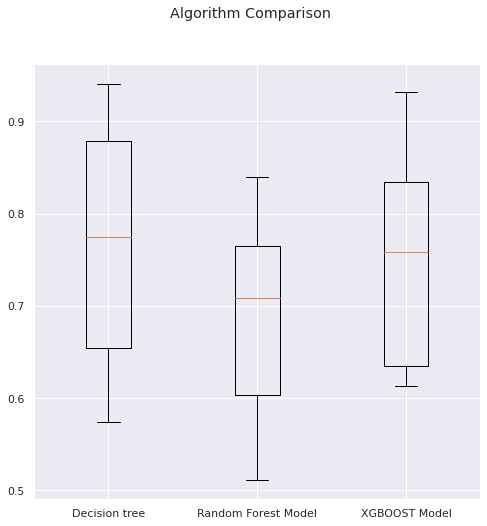

In [ ]:
from sklearn import model_selection
models = []
models.append(('Decision tree', DecisionTreeRegressor(max_depth=2)))
models.append(('Random Forest Model', RandomForestRegressor(n_estimators=50)))
models.append(('XGBOOST Model', XGBRegressor()))
# evaluate each model in turn
results = []
names = []
seed = 7
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure(figsize=(8,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

After comaring the model, we got that decision tree and XGBoost performas better than Random forest regressor.

# **Classification**

# **Tune Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import metrics 

In [ ]:
from sklearn.metrics import accuracy_score
#Training max depth decision tree graph
md_training_accuracy_list = []

for x in range(1,30):
  decision_tree = DecisionTreeClassifier(max_depth = x)
  decision_tree.fit(X_train,y_train)
  y_pred=decision_tree.predict(X_test)
  score = float(accuracy_score(y_test, y_pred))
  md_training_accuracy_list.append(score)


In [ ]:
#Validation max depth decision tree graph

md_validation_accuracy_list = []

for x in range(1,30):
  decision_tree = DecisionTreeClassifier(max_depth = x)
  decision_tree.fit(X_test,y_test)
  y_pred=decision_tree.predict(X_test)
  score = float(accuracy_score(y_test, y_pred))
  md_validation_accuracy_list.append(score)

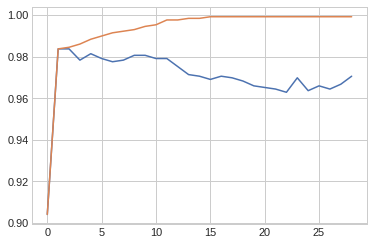

In [ ]:
#Plotting Max Depth
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
plt.plot(md_training_accuracy_list)
plt.plot(md_validation_accuracy_list)

From above plot we observe that testing accuracy is around 98%

In [ ]:
#Training min_samples_leaf decision tree graph

msl_training_accuracy_list = []

for x in range(1,50):
  decision_tree = DecisionTreeClassifier(min_samples_leaf = x)
  decision_tree.fit(X_train,y_train)
  y_pred=decision_tree.predict(X_test)
  score = float(accuracy_score(y_test, y_pred))
  msl_training_accuracy_list.append(score)

In [ ]:
#Validation min_samples_leaf decision tree graph

msl_validation_accuracy_list = []

for x in range(1,50):
  decision_tree = DecisionTreeClassifier(min_samples_leaf = x)
  decision_tree.fit(X_test,y_test)
  y_pred=decision_tree.predict(X_test)
  score = float(accuracy_score(y_test, y_test))
  msl_validation_accuracy_list.append(score)

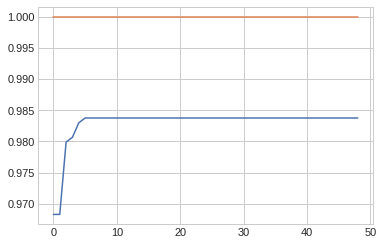

In [ ]:
#Plotting min_samples_leaf 
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
plt.plot(msl_training_accuracy_list)
plt.plot(msl_validation_accuracy_list)

# **Tune Random Forest Classifier.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Training n_estimators RandomForest graph

est_training_accuracy_list = []

for x in range(1,50):
  forest = RandomForestClassifier(n_estimators=x)
  forest.fit(X_train,y_train)
  y_pred=forest.predict(X_test)
  score = float(accuracy_score(y_test, y_pred))
  est_training_accuracy_list.append(score)

In [ ]:
#Validation n_estimators RandomForest graph

est_validation_accuracy_list = []

for x in range(1,50):
  forest = RandomForestClassifier(n_estimators=x)
  forest.fit(X_test,y_test)
  y_pred=forest.predict(X_test)
  score = float(accuracy_score(y_test, y_pred))
  est_validation_accuracy_list.append(score)

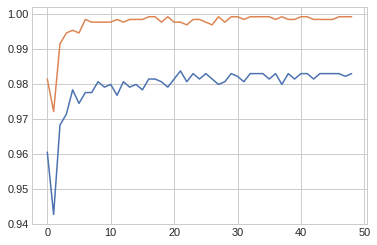

In [ ]:
#Plotting n_estimators
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
plt.plot(est_training_accuracy_list)
plt.plot(est_validation_accuracy_list)

From above graph we observed that the model accuracy is around 98.1%

**Evaluate model using test data**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

**decision tree**

In [ ]:
parameters = {
    'max_depth' : (5, 10, 15, 20, 25, 30),
    'min_samples_split' : (5, 10, 15, 20, 25, 30, 35, 40, 45, 50)
}

In [ ]:
DT_grid = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions = parameters, cv = 5, verbose = True)

In [ ]:
DT_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [ ]:
#finding the best estimation
DT_grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Rebuilding with best estimation
DT_Model = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

DT_Model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
print (f'Decision Tree Train Accuracy - : {DT_Model.score(X_train, y_train):.3f}')
print (f'Decision Tree test Accuracy - : {DT_Model.score(X_test, y_test):.3f}')

Decision Tree Train Accuracy - : 0.984
Decision Tree test Accuracy - : 0.981


We got accuracy of 98% using decision tree classifier

**Random Forest Classifier**

In [ ]:
parameters = {
    'n_estimators' : (5, 10, 15, 20, 25, 30, 35, 40, 45, 50),
}

In [ ]:
RF_grid = RandomizedSearchCV(RandomForestClassifier(), param_distributions = parameters, cv = 5, verbose = True)

In [ ]:
RF_grid.fit(X_train, y_train)

In [ ]:
#finding the best estimation
RF_grid.best_estimator_

In [ ]:
#Rebuilding with best estimation
RF_Model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=45,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RF_Model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=45,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print (f'Random Forest Classifier Train Accuracy - : {RF_Model.score(X_train, y_train):.3f}')
print (f'Random Forest Classifier validation Accuracy - : {RF_Model.score(X_test, y_test):.3f}')

Random Forest Classifier Train Accuracy - : 0.997
Random Forest Classifier validation Accuracy - : 0.981


We got accuracy of 98% using Random Forest Classifier

# **Neural Network**

In [ ]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
48/48 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2322
Epoch 2/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2322
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2322
Epoch 4/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2322
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2322
Epoch 6/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2322
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2322
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2322
Epoch 9/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2322
Epoch 10/100
48/48 [==============================] - 0s 2ms/step - loss:

In [ ]:
y_pred = model.predict(X_test)

After applying Neural network, we got an accuracy of 21.6% as mentioned below

In [ ]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_pred,y_test)
print('Accuracy is:', a*100)

Accuracy is: 21.655065738592423
